## 原型链

### 构造函数   
函数名首字母必须大写，约定； 

In [1]:
function Foo(name,age){
    this.name = name;
    this.age = age;
    this.class = 'class-1';
    return this //默认有这行；
}

In [2]:
var f = new Foo('zhangsan', 20); f;

Foo { name: 'zhangsan', age: 20, class: 'class-1' }

In [3]:
var f1 = new Foo('lisi',22);f1;

Foo { name: 'lisi', age: 22, class: 'class-1' }

In [4]:
var f2 = new Foo('wang'); f2;

Foo { name: 'wang', age: undefined, class: 'class-1' }

所有的引用类型都有构造函数：  
var a = {} 是 var a = new Object()的语法糖；   
var a = [] 是 var a = new Array() 的语法糖；   
function Foo(){} 是 var Foo = new Function()的语法糖；    
使用instanceof 判断一个函数是否是一个变量的构造函数；   


### 原型规则

1 所有的引用类型（数组、对象、函数,null除外），都具有对象特性，即可自由扩展属性；   
2 (null除外)都有一个__proto__属性（隐式原型），属性值是一个普通的对象；    
3 所有的**函数**，都有一个prototype属性（显式原型），属性值也是一个普通的对象；  
4 所有的引用类型（数组、对象、函数,null除外）, __proto__属性值指向（完全等于===）它的构造函数的prototype属性值；  
5 当试图得到一个对象的某个属性时，如果这个对象本身没有这个属性，那么会去它的__proto__(即它的构造函数的prototype)中寻找。  

In [6]:
var a = [1,2];
a.color = 'red';
a

[ 1, 2, color: 'red' ]

In [7]:
a.__proto__;

[]

In [5]:
i= function(){};
i.__proto__;

[Function]

In [6]:
i.prototype; //只有函数才有，与上条结果不同。

i {}

In [7]:
i.__proto__ === Function.prototype; //完全相等；

true

In [13]:
function(){}.__proto__; //只有在复制创建时才有隐性型；

SyntaxError: Unexpected token (

In [17]:
typeof function(){};

'function'

In [15]:
var o={};
o.__proto__;

{}

In [14]:
{}.__proto__;

SyntaxError: Unexpected token .

In [16]:
var n = null;
n.__proto__;

TypeError: Cannot read property '__proto__' of null

In [8]:
null.__proto__;

TypeError: Cannot read property '__proto__' of null

In [1]:
function fn(){};
fn.prototype;

fn {}

### 第5条的测试

In [33]:
function Foo(name,age){
    this.name = name;
}
Foo.prototype.name= "lisi";
Foo.prototype.alertName=function (){
    console.log(this.name + " hello");
}

var f = new Foo('zhangsan');
f.printName = function(){console.log(this.name)}
console.log(f.name);

zhangsan


In [34]:
f.alertName;

[Function]

In [35]:
f.alertName(); //通过对象执行函数时，this永远指向对象本身

zhangsan hello


In [37]:
var item;
for (item in f){ //也会找到原型链上的属性
//     if(f.hasOwnProperty(item)){ //找到自身的属性；
        console.log(item);
//     }
}

name
printName
alertName


In [38]:
f.toString();//去f.__proto__.__proto__中查找，并找到了

'[object Object]'

In [39]:
f.__proto__.toString();

'[object Object]'

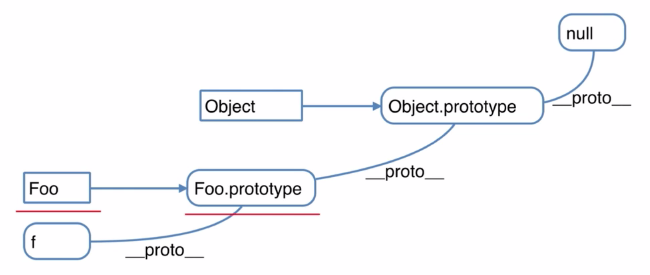

### instanceof 用于判断引用类型属于哪个构造函数的方法

In [40]:
f instanceof Foo; //f的__proto__一层层往上，与Foo.prototype对比

true

In [41]:
f instanceof Object;

true

In [44]:
Object.prototype.__proto__;

null

In [45]:
f instanceof null;

TypeError: Right-hand side of 'instanceof' is not an object

#### 1 如何准确判断一个变量是数组类型

In [46]:
var arr = [];
arr instanceof Array;

true

In [47]:
typeof arr;

'object'

#### 2 写一个原型链继承的例子

In [48]:
function Animal(){
    this.eat = function(){
        console.log('animal eat');
    }
}
function Dog(){
    this.bark = function(){
        console.log('dog bark');
    }
}
Dog.prototype = new Animal(); //把默认的改掉；
var hashiqi = new Dog();
hashiqi.eat();

animal eat


#### 3 描述new一个对象的过程
* 创建一个新对象
* this 指向这个新对象
* 执行代码，即对this （属性）赋值；
* return this; 

#### 4 zepto源码中如何使用原型链
* 读源码，高效提高技能。
* 搜索 zepto设计和源码分析。

#### 写一个封装DOM查询的例子

In [50]:
function Elem(id){
    this.elem = document.getElementById(id);
}
Elem.prototype.html = function (val){
    var elem = this.elem;
    if(val){
        elem.innerHTML = val;
        return this; //链式操作；
    } else {
        return elem.innerHTML;
    }
}
Elem.prototype.on = function (type,fn){
    var elem = this.elem;
    elem.addEventListener(type,fn);
}
var div1 = new Elem('div1');
console.log(div1.html());

ReferenceError: document is not defined

In [ ]:
div1.html("hello imooc");
div1.on('click',funcion(){
        alert("clicked");
        })

#### 对象的原型比较；

In [51]:
var dog1 = new Dog();
var dog2 = new Dog();
dog1 === dog2;

false

In [52]:
dog1.__proto__ === dog2.__proto__;

true

In [57]:
function cat(){};
cat.prototype.__proto__ === Object;

false

In [66]:
cat.__proto__.__proto__ 

{}

In [69]:
var x = {};
x.__proto__

{}

In [70]:
cat.__proto__.__proto__ === x.__proto__ //不同的来源使用共同的隐式原型

true

In [71]:
cat.__proto__.__proto__.age = 10;

10

In [72]:
x.__proto__.age //共用同一原型； 

10